# Prevendo Câncer de Mama

O câncer de mama é uma doença em que células malignas (cancerosas) se desenvolvem nos tecidos da mama. Ele pode começar em diferentes partes da mama, como os ductos que transportam o leite para o mamilo ou os lóbulos, que produzem o leite.
O projeto consiste em prever se um câncer de mama é benigno ou maligno, através de observações de biópsias de câncer.


## Obtenção de dados

Todos os dados foram retirados da comunidade on-line de cientistas de dados e praticantes de aprendizado de máquina [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

Para esta análise, será baixado e usado o seguinte arquivo:
`df.csv`

In [4]:
#importando pacotes necessarios 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

#Semente para aleatoriedade
seed = 123

#Ajustar num Linhas/colunas Pandas
pd.options.display.max_columns= None

#Ocultar mensagems de warning
import warnings
warnings. filterwarnings('ignore')

#Exibir todas as satdas de cada célula do Jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Dicionário dos Dados

Esse dataset possui 569 observações de biópsias de câncer, cada um com 32 características (variáveis).

Esta tabela contém informações de pacientes com câncer de mama, sendo uma das características o número de identificação `(ID)`, outra sendo o diagnóstico (variável alvo/target) indicando se o câncer é maligno ou benigno (codificado como “M” e “B”, respectivamente). As outras 30 características são medidas laboratoriais numéricas obtidas a partir dos exames dos pacientes.

Para visualizar as informações do DataFrame, imprimimos as cinco primeiras linhas. Cabe ressaltar que existem mais colunas além das que são exibidas a abaixo.

In [7]:
df = pd.read_csv('df.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(labels = ['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [4]:
df.diagnosis = df.diagnosis.replace({'M':'Maligno', 'B': 'Benigno' })

In [5]:
df.diagnosis.value_counts() / df.shape[0] * 100

Benigno    62.741652
Maligno    37.258348
Name: diagnosis, dtype: float64

In [6]:
# Separamos em X as varidveis preditoras e em y a varidvel target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Aplicamos a normalização aos dados de X, e colocamos no DataFrame X_norm
X_norm = pd.DataFrame(MinMaxScaler(feature_range = (0, 1)).fit_transform(X))

# Imprimi as 5 primeiras Linhas dos dados jd normalizados
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Avaliação do Modelo

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,
y,
test_size = 0.3,
random_state = seed)

In [8]:
df.diagnosis.value_counts() / df.shape[0] * 100
y_train.value_counts() / y_train.shape[0] * 100
y_test.value_counts() / y_test.shape[0] * 100

Benigno    62.741652
Maligno    37.258348
Name: diagnosis, dtype: float64

Benigno    63.819095
Maligno    36.180905
Name: diagnosis, dtype: float64

Benigno    60.233918
Maligno    39.766082
Name: diagnosis, dtype: float64

In [10]:
# Criando o modelo
modelo_knn_v1 = KNeighborsClassifier(n_neighbors = 5, n_jobs = 2)

# Fitting/Treino do modelo
modelo_knn_v1.fit(X_train, y_train)


KNeighborsClassifier(n_jobs=2)

In [12]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=2, n_neighbors=5, p=2,
weights='uniform')

KNeighborsClassifier(n_jobs=2)

In [13]:
# Realizando as previsões
previsao = modelo_knn_v1.predict(X_test)

# Medição pela acuracia
print('Acurácia: {:.3f}'.format(accuracy_score(y_test, previsao)))

# Medição pelo Classification Report
print('\nClassification Report:\n', classification_report(y_test, previsao))

Acurácia: 0.977

Classification Report:
               precision    recall  f1-score   support

     Benigno       0.98      0.98      0.98       103
     Maligno       0.97      0.97      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [25]:
# Lista para armazenar o valor médio de cada Cross Validation
cv_scores = []

# Lista para armazenar os valores de K utilizados no modelo KNN
valores_k = []

# Separando os dados em folds (vamos fazer 10 folds de dados)
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)

# Treinando o modelo
for k in range(1, 30, 2):
    modelo = KNeighborsClassifier(n_neighbors=k, n_jobs=2)
scores = cross_val_score(modelo,
X_norm,
y,
cv = kfold,
scoring = 'accuracy')
cv_scores.append(scores.mean())
valores_k.append(k)

In [27]:
pd.DataFrame(data = cv_scores,
index = valores_k,
columns = ['mean_scores']).sort_values(by = 'mean_scores',
ascending = False).head(1)

,mean_scores
29,0.959524


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

Text(0.5, 1.0, 'KNN Classification')

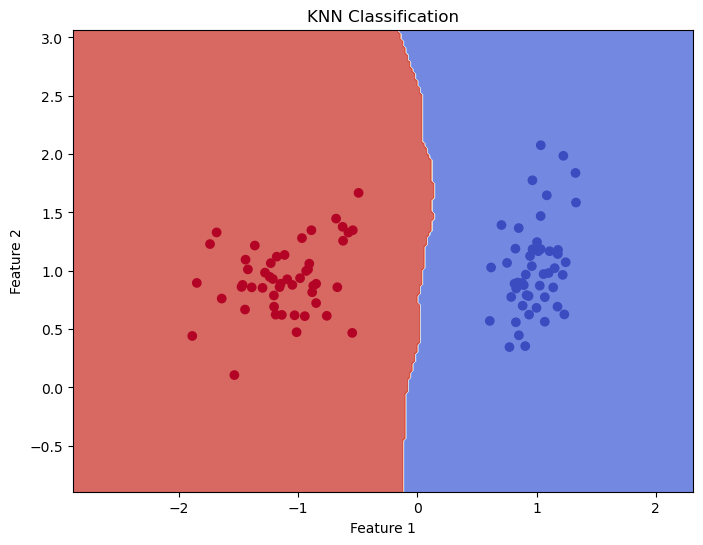

In [30]:

# plotar o gráfico
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification')
plt.show()

# conclusão

Concluímos esta demonstração em que observamos que o algoritmo KNN, apesar de ser simples e possuir poucos parâmetros com treinamento rápido, pode criar modelos com excelentes resultados em previsões.

Podemos continuar trabalhando com as variáveis preditoras, selecionando apenas algumas para o treinamento do modelo, ou realizar engenharia de atributos para criar novos atributos que podem melhorar ainda mais o desempenho do modelo.

Este processo é iterativo, ou seja, uma vez que temos o modelo treinado, podemos voltar ao início e tentar diferentes abordagens nos dados ou no próprio modelo, manipulando seus parâmetros e testando novas hipóteses.

Portanto, é essencial ter clareza sobre o resultado que se deseja alcançar com o modelo, para otimizar o trabalho e superar o próximo desafio.